## Import required libraries

In [2]:
!pip install opencv-python

In [3]:
!pip install tensorflow


In [4]:
import numpy as np 
import pandas as pd 
import matplotlib.pyplot as plt
import cv2
import tensorflow as tf
from PIL import Image
import os
os.chdir('C:\\Users\\Mythresh Neerugattu\\Desktop\\Intelligent sys\\Traffic_Sign_Recognition')
from sklearn.model_selection import train_test_split
from keras.utils import to_categorical
from keras.models import Sequential, load_model
from keras.layers import Conv2D, MaxPool2D, Dense, Flatten, Dropout

## Store data, labels in the list

In [6]:
# data = []
# labels = []
# # We have 43 Classes
classes = 43
cur_path = os.getcwd()

In [7]:
import os

# dir_path = '/path/to/my_directory'

# Get a list of all files and directories in the directory
contents = os.listdir(cur_path)

# Iterate over the contents and do something with each file or directory
for item in contents:
    # Do something with the item
    print(item)


Meta
Meta.csv
Test
Test.csv
Train
Train.csv


In [8]:
cur_path

'C:\\Users\\Mythresh Neerugattu\\Desktop\\Intelligent sys\\Traffic_Sign_Recognition'

## Preprocess the images

In [10]:
# for i in range(classes):
#     path = os.path.join(cur_path,'Train',str(i))
#     images = os.listdir(path)
#     for a in images:
#         try:
#             image = Image.open(path + '\\'+ a)
#             image = image.resize((30,30))
#             image = np.array(image)
#             data.append(image)
#             labels.append(i)
#         except Exception as e:
#             print(e)

# cur_path = os.getcwd()
data_path = os.path.join(cur_path, "Train")

# Preprocessing parameters
img_size = 64
batch_size = 32

# Load the data and perform pre-processing
data = []
labels = []

for i in range(43):
    path = os.path.join(data_path, str(i))
    images = os.listdir(path)
    for a in images:
        try:
            image = Image.open(os.path.join(path, a))
            # Resize the images to a larger size
            image = image.resize((img_size, img_size))
            image = np.array(image)
            # Normalize the pixel values to [0, 1]
            image = image / 255.0
            data.append(image)
            labels.append(i)
        except Exception as e:
            print(e)



In [11]:
images = os.listdir(path)
images

['00042_00000_00000.png',
 '00042_00000_00001.png',
 '00042_00000_00002.png',
 '00042_00000_00003.png',
 '00042_00000_00004.png',
 '00042_00000_00005.png',
 '00042_00000_00006.png',
 '00042_00000_00007.png',
 '00042_00000_00008.png',
 '00042_00000_00009.png',
 '00042_00000_00010.png',
 '00042_00000_00011.png',
 '00042_00000_00012.png',
 '00042_00000_00013.png',
 '00042_00000_00014.png',
 '00042_00000_00015.png',
 '00042_00000_00016.png',
 '00042_00000_00017.png',
 '00042_00000_00018.png',
 '00042_00000_00019.png',
 '00042_00000_00020.png',
 '00042_00000_00021.png',
 '00042_00000_00022.png',
 '00042_00000_00023.png',
 '00042_00000_00024.png',
 '00042_00000_00025.png',
 '00042_00000_00026.png',
 '00042_00000_00027.png',
 '00042_00000_00028.png',
 '00042_00000_00029.png',
 '00042_00001_00000.png',
 '00042_00001_00001.png',
 '00042_00001_00002.png',
 '00042_00001_00003.png',
 '00042_00001_00004.png',
 '00042_00001_00005.png',
 '00042_00001_00006.png',
 '00042_00001_00007.png',
 '00042_0000

## Converting lists into numpy arrays

In [13]:
data = np.array(data)
labels = np.array(labels)

In [14]:
labels

array([ 0,  0,  0, ..., 42, 42, 42])

## Save Labels & Data for future use

In [16]:
if not os.path.exists('training'):
    os.mkdir('training')
else:
    print('Training directory already exists, skipping creation.')

np.save('./training/data',data)
np.save('./training/target',labels)


## Load data & Labels

In [18]:
data=np.load('./training/data.npy')
labels=np.load('./training/target.npy')

In [19]:
print(data.shape, labels.shape)

(39209, 64, 64, 3) (39209,)


In [20]:
X_train, X_test, y_train, y_test = train_test_split(data, labels, test_size=0.2, random_state=0)

In [21]:
print(X_train.shape, X_test.shape, y_train.shape, y_test.shape)

(31367, 64, 64, 3) (7842, 64, 64, 3) (31367,) (7842,)


## Convert labels to onehot encoding

In [23]:
y_train = to_categorical(y_train, 43)
y_test = to_categorical(y_test, 43)

## Now it's time to build the model

In [25]:
# model = Sequential()
# model.add(Conv2D(filters=32, kernel_size=(5,5), activation='relu', input_shape=X_train.shape[1:]))
# model.add(Conv2D(filters=32, kernel_size=(5,5), activation='relu'))
# model.add(MaxPool2D(pool_size=(2, 2)))
# model.add(Dropout(rate=0.25))
# model.add(Conv2D(filters=64, kernel_size=(3, 3), activation='relu'))
# model.add(Conv2D(filters=64, kernel_size=(3, 3), activation='relu'))
# model.add(MaxPool2D(pool_size=(2, 2)))
# model.add(Dropout(rate=0.25))
# model.add(Flatten())
# model.add(Dense(256, activation='relu'))
# model.add(Dropout(rate=0.5))
# # We have 43 classes that's why we have defined 43 in the dense
# model.add(Dense(43, activation='softmax'))
from tensorflow.keras.layers import LeakyReLU
model = Sequential()

model.add(Conv2D(filters=32, kernel_size=(3, 3), activation='relu', input_shape=(img_size, img_size, 3)))
model.add(Conv2D(filters=32, kernel_size=(3, 3), activation='relu'))
model.add(MaxPool2D(pool_size=(2, 2)))
model.add(Dropout(rate=0.25))

model.add(Conv2D(filters=64, kernel_size=(3, 3), activation='relu'))
model.add(Conv2D(filters=64, kernel_size=(3, 3), activation='relu'))
model.add(MaxPool2D(pool_size=(2, 2)))
model.add(Dropout(rate=0.25))

model.add(Conv2D(filters=128, kernel_size=(3, 3), activation='relu'))
model.add(Conv2D(filters=128, kernel_size=(3, 3), activation='relu'))
model.add(MaxPool2D(pool_size=(2, 2)))
model.add(Dropout(rate=0.25))

model.add(Flatten())
model.add(Dense(units=512))
model.add(LeakyReLU(alpha=0.1))
model.add(Dropout(rate=0.5))
model.add(Dense(units=43, activation='softmax'))

C:\Users\Mythresh Neerugattu\anaconda3\Lib\site-packages\keras\src\layers\convolutional\base_conv.py:107: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)
C:\Users\Mythresh Neerugattu\anaconda3\Lib\site-packages\keras\src\layers\activations\leaky_relu.py:41: UserWarning: Argument `alpha` is deprecated. Use `negative_slope` instead.
  warnings.warn(


In [26]:
#Compilation of the model
model.compile(loss='categorical_crossentropy', optimizer='adam', metrics=['accuracy'])

In [28]:
# epochs = 20
history = model.fit(X_train, y_train, batch_size=32, epochs=20, validation_data=(X_test, y_test))

Epoch 1/20
981/981 ━━━━━━━━━━━━━━━━━━━━ 280s 285ms/step - accuracy: 0.9616 - loss: 0.1324 - val_accuracy: 0.9898 - val_loss: 0.0378
Epoch 2/20
981/981 ━━━━━━━━━━━━━━━━━━━━ 294s 300ms/step - accuracy: 0.9737 - loss: 0.0875 - val_accuracy: 0.9875 - val_loss: 0.0421
Epoch 3/20
981/981 ━━━━━━━━━━━━━━━━━━━━ 288s 294ms/step - accuracy: 0.9782 - loss: 0.0726 - val_accuracy: 0.9841 - val_loss: 0.0558
Epoch 4/20
981/981 ━━━━━━━━━━━━━━━━━━━━ 281s 287ms/step - accuracy: 0.9825 - loss: 0.0571 - val_accuracy: 0.9935 - val_loss: 0.0294
Epoch 5/20
981/981 ━━━━━━━━━━━━━━━━━━━━ 288s 294ms/step - accuracy: 0.9860 - loss: 0.0451 - val_accuracy: 0.9938 - val_loss: 0.0242
Epoch 6/20
981/981 ━━━━━━━━━━━━━━━━━━━━ 279s 284ms/step - accuracy: 0.9850 - loss: 0.0502 - val_accuracy: 0.9959 - val_loss: 0.0174
Epoch 7/20
981/981 ━━━━━━━━━━━━━━━━━━━━ 298s 304ms/step - accuracy: 0.9883 - loss: 0.0404 - val_accuracy: 0.9957 - val_loss: 0.0184
Epoch 8/20
981/981 ━━━━━━━━━━━━━━━━━━━━ 300s 281ms/step - accuracy: 0.9892 -

In [29]:
model.save('my_model.h5')
from tensorflow.keras.models import load_model

loaded_model = load_model('my_model.h5')


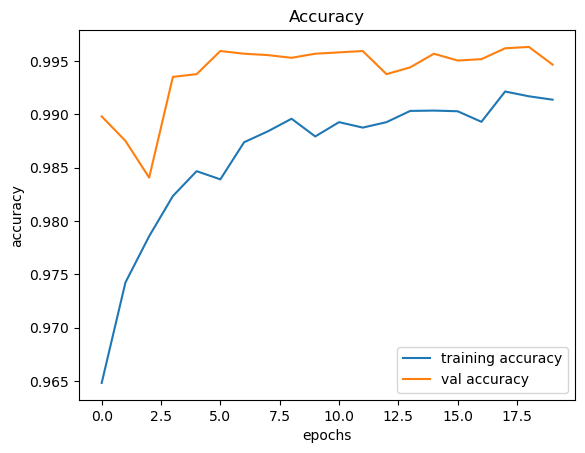

In [30]:
# accuracy 
plt.figure(0)
plt.plot(history.history['accuracy'], label='training accuracy')
plt.plot(history.history['val_accuracy'], label='val accuracy')
plt.title('Accuracy')
plt.xlabel('epochs')
plt.ylabel('accuracy')
plt.legend()
plt.show()

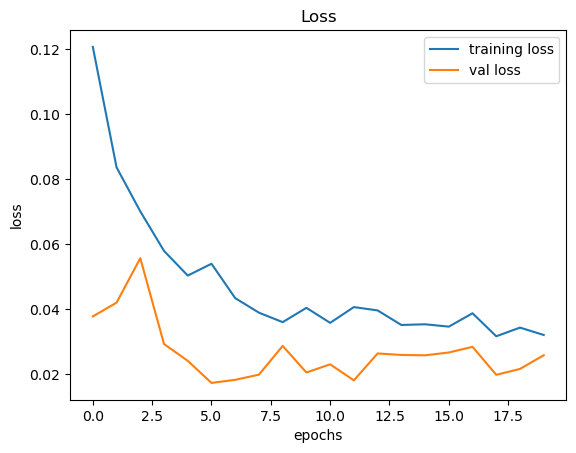

In [31]:
# Loss
plt.plot(history.history['loss'], label='training loss')
plt.plot(history.history['val_loss'], label='val loss')
plt.title('Loss')
plt.xlabel('epochs')
plt.ylabel('loss')
plt.legend()
plt.show()

## LEt's do testing on Test data

In [33]:
def testing(testcsv):
    y_test = pd.read_csv(testcsv)
    label = y_test["ClassId"].values
    imgs = y_test["Path"].values
    data=[]
    for img in imgs:
        image = Image.open(img)
        image = image.resize((64,64))
        data.append(np.array(image))
    X_test=np.array(data)
    return X_test,label

In [34]:
X_test, label = testing('Test.csv')

In [35]:
Y_pred = model.predict(X_test)
Y_pred

395/395 ━━━━━━━━━━━━━━━━━━━━ 33s 83ms/step


array([[0., 0., 0., ..., 0., 0., 0.],
       [0., 1., 0., ..., 0., 0., 0.],
       [0., 0., 0., ..., 0., 0., 0.],
       ...,
       [0., 0., 0., ..., 0., 0., 0.],
       [0., 0., 0., ..., 0., 0., 0.],
       [0., 0., 0., ..., 0., 0., 0.]], dtype=float32)

## Accuracy with the test data

In [37]:
from sklearn.metrics import accuracy_score
# print(accuracy_score(label, Y_pred))

Y_pred_int = np.argmax(Y_pred, axis=1)
print(accuracy_score(label, Y_pred_int))


0.9336500395882819


## Save the model

In [39]:
model.save("./training/TSR.h5")

## Load the Model

In [41]:
import os
os.chdir(r'C:\\Users\\Mythresh Neerugattu\\Desktop\\Intelligent sys\\Traffic_Sign_Recognition')
from keras.models import load_model
model = load_model('./training/TSR.h5')

In [42]:
# Classes of trafic signs
classes = { 0:'Speed limit (20km/h)',
            1:'Speed limit (30km/h)', 
            2:'Speed limit (50km/h)', 
            3:'Speed limit (60km/h)', 
            4:'Speed limit (70km/h)', 
            5:'Speed limit (80km/h)', 
            6:'End of speed limit (80km/h)', 
            7:'Speed limit (100km/h)', 
            8:'Speed limit (120km/h)', 
            9:'No passing', 
            10:'No passing veh over 3.5 tons', 
            11:'Right-of-way at intersection', 
            12:'Priority road', 
            13:'Yield', 
            14:'Stop', 
            15:'No vehicles', 
            16:'Veh > 3.5 tons prohibited', 
            17:'No entry', 
            18:'General caution', 
            19:'Dangerous curve left', 
            20:'Dangerous curve right', 
            21:'Double curve', 
            22:'Bumpy road', 
            23:'Slippery road', 
            24:'Road narrows on the right', 
            25:'Road work', 
            26:'Traffic signals', 
            27:'Pedestrians', 
            28:'Children crossing', 
            29:'Bicycles crossing', 
            30:'Beware of ice/snow',
            31:'Wild animals crossing', 
            32:'End speed + passing limits', 
            33:'Turn right ahead', 
            34:'Turn left ahead', 
            35:'Ahead only', 
            36:'Go straight or right', 
            37:'Go straight or left', 
            38:'Keep right', 
            39:'Keep left', 
            40:'Roundabout mandatory', 
            41:'End of no passing', 
            42:'End no passing veh > 3.5 tons' }

In [43]:
# classes = ['Speed limit (20km/h)', 'Speed limit (30km/h)', 'Speed limit (50km/h)', 'Speed limit (60km/h)',           'Speed limit (70km/h)', 'Speed limit (80km/h)', 'End of speed limit (80km/h)', 'Speed limit (100km/h)',           'Speed limit (120km/h)', 'No passing', 'No passing veh over 3.5 tons', 'Right-of-way at intersection',           'Priority road', 'Yield', 'Stop', 'No vehicles', 'Veh > 3.5 tons prohibited', 'No entry',           'General caution', 'Dangerous curve left', 'Dangerous curve right', 'Double curve', 'Bumpy road',           'Slippery road', 'Road narrows on the right', 'Road work', 'Traffic signals', 'Pedestrians',           'Children crossing', 'Bicycles crossing', 'Beware of ice/snow', 'Wild animals crossing',           'End speed + passing limits', 'Turn right ahead', 'Turn left ahead', 'Ahead only', 'Go straight or right',           'Go straight or left', 'Keep right', 'Keep left', 'Roundabout mandatory', 'End of no passing',           'End no passing veh > 3.5 tons']


In [44]:
from PIL import Image
import numpy as np
import matplotlib.pyplot as plt
def test_on_img(img):
    data=[]
    image = Image.open(img)
    image = image.resize((64,64))
    data.append(np.array(image))
    X_test=np.array(data)
    Y_pred = model.predict(X_test)
    return image,Y_pred

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 270ms/step
Predicted traffic sign is:  Speed limit (30km/h)


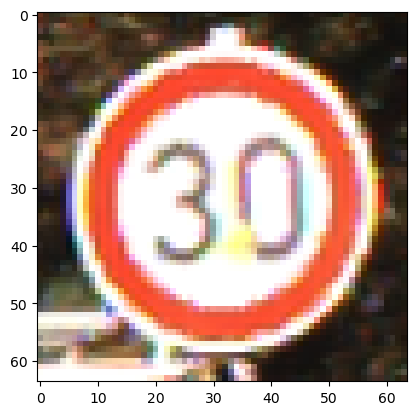

In [45]:
# plot, prediction = test_on_img(r'C:\Users\Tharun\OneDrive\Desktop\Intelligent_systems\Traffic_Sign_Recognition\Test\00024.png')
# a = np.argmax(prediction)
# print("Predicted traffic sign is: ", classes[a])
# plt.imshow(plot)

# plot,prediction = test_on_img(r'C:\Users\Tharun\OneDrive\Desktop\Intelligent_systems\Traffic_Sign_Recognition\Test\00024.png')
# s = [str(i) for i in prediction] 
# a = np.argmax(prediction)

# a = int("".join(s)) 
# print("Predicted traffic sign is: ", classes[a])
# plt.imshow(plot)
# plt.show()
plot, prediction = test_on_img(r"C:\Users\Mythresh Neerugattu\Desktop\Intelligent sys\Traffic_Sign_Recognition\Test\00024.png")
a = np.argmax(prediction)
# print("Predicted traffic sign is: ", classes[a])
print("Predicted traffic sign is: ", classes.get(a))

plt.imshow(plot)
